In [ ]:
!pip install emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 608.4/608.4 kB 10.1 MB/s eta 0:00:00


In [ ]:
!pip install Sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.7 MB/s eta 0:00:00


In [ ]:
!pip install indoNLP

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.9/121.9 kB 2.6 MB/s eta 0:00:00


In [ ]:
import pandas as pd

url = "https://drive.google.com/uc?id=1hytmkQ9tWhDuznPks5qEtLHkQyMMvxo6"

df = pd.read_excel(url)
display(df)

,Username,Ulasan,Rating,Tanggal,pelabel 1,pelabel 2,pelabel 3,label
0,Zoan Bandai,keren,5,2025-09-14 05:36:00,positif,positif,positif,positif
1,yudha panca,dokternya ramah dan sabar menjawab pertanyaan ...,5,2025-09-14 04:28:00,positif,positif,positif,positif
2,Gladys Estiwijayanti,dokter nya pengertian bngt plis.. kalian kalo ...,5,2025-09-14 03:39:00,positif,positif,positif,positif
3,Keindra 344kl,"sangat membantu,,semoga obat dari dokter spesi...",5,2025-09-14 03:15:00,positif,positif,positif,positif
4,Zafran Altarazka,"sangat memuaskan, SGT terbantu dgn adanya halo...",5,2025-09-14 01:38:00,positif,positif,positif,positif
...,...,...,...,...,...,...,...,...
15995,Buche Sal,Sy suka dgn adanya aplikasi Halodoc krn memuda...,5,2022-11-18 19:11:00,positif,positif,positif,positif
15996,Ricky Sarese,Sangat baik,5,2022-11-18 18:25:00,positif,positif,positif,positif
15997,Trias Deva,Apakah halo doc saat ingin bertanya selalu gra...,5,2022-11-18 16:25:00,positif,positif,positif,positif
15998,Rinaldi Hartoyo,Mudah & bermanfaat,5,2022-11-18 15:50:00,positif,positif,positif,positif


# ***PREPROCESSING TEXT***

1. *Case Folding*
2. *Cleaning*
3. *Tokenizing*
4. *Stopword*
5. *Stemming*
6. *Normalized*

In [ ]:
import pandas as pd
import re
import string
import nltk
import emoji
from nltk.tokenize import word_tokenize

# Download tokenizer NLTK
nltk.download("punkt")
nltk.download("punkt_tab")

print("Jumlah awal data:", len(df))

df = df.drop_duplicates(subset=["Ulasan"])
df = df.dropna(subset=["Ulasan"])

print("Setelah hapus duplikat:", len(df))


def clean_text(text):
    text = str(text).lower()  # ubah ke huruf kecil
    text = re.sub(r'http\S+', '', text)  # hapus link
    text = re.sub(r'@\w+|\#', '', text)  # hapus mention & hashtag
    text = emoji.replace_emoji(text, replace='')  # hapus emoji
    text = re.sub(r'[^\x00-\x7F]+', ' ', text) # hapus karakter yang bukan huruf/angka
    text = re.sub(r'\b\d+\b', ' ', text)  # angka berdiri sendiri
    text = re.sub(r'\w*\d\w*', ' ', text)  # kata yang mengandung angka
    text = text.translate(str.maketrans('', '', string.punctuation)) # menghapus tanda baca
    text = re.sub(r'\s+', ' ', text) # mengganti spasi berlebih
    text = text.strip() # menghapus spasi di awal dan akhir kalimat
    return text

df["Ulasan_Clean"] = df["Ulasan"].apply(clean_text)

# Tokenisasi
df["Tokenized"] = df["Ulasan_Clean"].apply(word_tokenize)

df = df.drop(columns=["pelabel 1", "pelabel 2", "pelabel 3"], errors="ignore")
df.to_csv("ulasan_halodoc_preclean.csv", index=False, encoding="utf-8")
display(df[["Ulasan", "Ulasan_Clean", "Tokenized"]].head(10))


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


Jumlah awal data: 16000
Setelah hapus duplikat: 11489


,Ulasan,Ulasan_Clean,Tokenized
0,keren,keren,[keren]
1,dokternya ramah dan sabar menjawab pertanyaan ...,dokternya ramah dan sabar menjawab pertanyaan ...,"[dokternya, ramah, dan, sabar, menjawab, perta..."
2,dokter nya pengertian bngt plis.. kalian kalo ...,dokter nya pengertian bngt plis kalian kalo ta...,"[dokter, nya, pengertian, bngt, plis, kalian, ..."
3,"sangat membantu,,semoga obat dari dokter spesi...",sangat membantusemoga obat dari dokter spesial...,"[sangat, membantusemoga, obat, dari, dokter, s..."
4,"sangat memuaskan, SGT terbantu dgn adanya halo...",sangat memuaskan sgt terbantu dgn adanya halod...,"[sangat, memuaskan, sgt, terbantu, dgn, adanya..."
5,aplikasi ini sebenarnya sangat membantu saya u...,aplikasi ini sebenarnya sangat membantu saya u...,"[aplikasi, ini, sebenarnya, sangat, membantu, ..."
6,respon para dokter cepat,respon para dokter cepat,"[respon, para, dokter, cepat]"
7,Bagus n keren,bagus n keren,"[bagus, n, keren]"
8,alhamdulillah cukup puas,alhamdulillah cukup puas,"[alhamdulillah, cukup, puas]"
9,dokter fajriansyah the best,dokter fajriansyah the best,"[dokter, fajriansyah, the, best]"


In [ ]:
import pandas as pd
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

df = pd.read_csv("ulasan_halodoc_preclean.csv", encoding="utf-8")

# Pastikan kolom Tokenized berupa list (bukan string)
df["Tokenized"] = df["Tokenized"].apply(eval)

# Siapkan daftar stopwords Bahasa Indonesia
stop_factory = StopWordRemoverFactory()
stop_words = set(stop_factory.get_stop_words())

# Fungsi untuk hapus stopwords
def remove_stopwords(tokens):
    return [word for word in tokens if word not in stop_words]

# Hapus stopwords dari token
df["Tokenized_NoStopwords"] = df["Tokenized"].apply(remove_stopwords)

df.to_csv("ulasan_halodoc_stopwords.csv", index=False, encoding="utf-8")
display(df[["Ulasan_Clean", "Tokenized", "Tokenized_NoStopwords"]].head(10))


,Ulasan_Clean,Tokenized,Tokenized_NoStopwords
0,keren,[keren],[keren]
1,dokternya ramah dan sabar menjawab pertanyaan ...,"[dokternya, ramah, dan, sabar, menjawab, perta...","[dokternya, ramah, sabar, menjawab, pertanyaan..."
2,dokter nya pengertian bngt plis kalian kalo ta...,"[dokter, nya, pengertian, bngt, plis, kalian, ...","[dokter, nya, pengertian, bngt, plis, kalian, ..."
3,sangat membantusemoga obat dari dokter spesial...,"[sangat, membantusemoga, obat, dari, dokter, s...","[sangat, membantusemoga, obat, dokter, spesial..."
4,sangat memuaskan sgt terbantu dgn adanya halod...,"[sangat, memuaskan, sgt, terbantu, dgn, adanya...","[sangat, memuaskan, sgt, terbantu, dgn, adanya..."
5,aplikasi ini sebenarnya sangat membantu saya u...,"[aplikasi, ini, sebenarnya, sangat, membantu, ...","[aplikasi, sebenarnya, sangat, membantu, konsu..."
6,respon para dokter cepat,"[respon, para, dokter, cepat]","[respon, dokter, cepat]"
7,bagus n keren,"[bagus, n, keren]","[bagus, n, keren]"
8,alhamdulillah cukup puas,"[alhamdulillah, cukup, puas]","[alhamdulillah, cukup, puas]"
9,dokter fajriansyah the best,"[dokter, fajriansyah, the, best]","[dokter, fajriansyah, the, best]"


In [ ]:
import pandas as pd
import ast
import re
from indoNLP.preprocessing import replace_slang

df = pd.read_csv("ulasan_halodoc_stopwords.csv")
df["Tokenized_NoStopwords"] = df["Tokenized_NoStopwords"].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

def clean_typo(tokens):
    cleaned = []
    for w in tokens:
        w = re.sub(r'(.)\1{2,}', r'\1', w)  # hilangkan huruf berulang
        w = replace_slang(w)                # ubah slang jadi baku
        if len(w) > 2:                      # buang kata pendek aneh
            cleaned.append(w)
    return cleaned

df["Normalized"] = df["Tokenized_NoStopwords"].apply(clean_typo)
df.to_csv("ulasan_halodoc_normalized.csv", index=False, encoding="utf-8")

display(df[["Tokenized_NoStopwords", "Normalized"]].head(10))

,Tokenized_NoStopwords,Normalized
0,[keren],[keren]
1,"[dokternya, ramah, sabar, menjawab, pertanyaan...","[dokternya, ramah, sabar, menjawab, pertanyaan..."
2,"[dokter, nya, pengertian, bngt, plis, kalian, ...","[dokter, nya, pengertian, banget, plis, kalian..."
3,"[sangat, membantusemoga, obat, dokter, spesial...","[sangat, membantusemoga, obat, dokter, spesial..."
4,"[sangat, memuaskan, sgt, terbantu, dgn, adanya...","[sangat, memuaskan, sangat, terbantu, dengan, ..."
5,"[aplikasi, sebenarnya, sangat, membantu, konsu...","[aplikasi, sebenarnya, sangat, membantu, konsu..."
6,"[respon, dokter, cepat]","[respon, dokter, cepat]"
7,"[bagus, n, keren]","[bagus, keren]"
8,"[alhamdulillah, cukup, puas]","[alhamdulillah, cukup, puas]"
9,"[dokter, fajriansyah, the, best]","[dokter, fajriansyah, the, best]"


In [ ]:
import pandas as pd
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

df = pd.read_csv("ulasan_halodoc_normalized.csv", encoding="utf-8")

# Pastikan kolom Tokenized_NoStopwords berupa list (bukan string)
df["Normalized"] = df["Normalized"].apply(eval)

# Siapkan stemmer Sastrawi
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Fungsi stemming per token
def stemming(tokens):
    return [stemmer.stem(word) for word in tokens]

df["Stemmed"] = df["Normalized"].apply(stemming)

df.to_csv("ulasan_halodoc_stemmed.csv", index=False, encoding="utf-8")
display(df[["Ulasan_Clean", "Normalized", "Stemmed"]].head(10))

,Ulasan_Clean,Normalized,Stemmed
0,keren,[keren],[keren]
1,dokternya ramah dan sabar menjawab pertanyaan ...,"[dokternya, ramah, sabar, menjawab, pertanyaan...","[dokter, ramah, sabar, jawab, tanya, pasien]"
2,dokter nya pengertian bngt plis kalian kalo ta...,"[dokter, nya, pengertian, banget, plis, kalian...","[dokter, nya, erti, banget, plis, kalian, kalo..."
3,sangat membantusemoga obat dari dokter spesial...,"[sangat, membantusemoga, obat, dokter, spesial...","[sangat, membantusemoga, obat, dokter, spesial..."
4,sangat memuaskan sgt terbantu dgn adanya halod...,"[sangat, memuaskan, sangat, terbantu, dengan, ...","[sangat, muas, sangat, bantu, dengan, ada, hal..."
5,aplikasi ini sebenarnya sangat membantu saya u...,"[aplikasi, sebenarnya, sangat, membantu, konsu...","[aplikasi, benar, sangat, bantu, konsultasi, m..."
6,respon para dokter cepat,"[respon, dokter, cepat]","[respon, dokter, cepat]"
7,bagus n keren,"[bagus, keren]","[bagus, keren]"
8,alhamdulillah cukup puas,"[alhamdulillah, cukup, puas]","[alhamdulillah, cukup, puas]"
9,dokter fajriansyah the best,"[dokter, fajriansyah, the, best]","[dokter, fajriansyah, the, best]"


In [ ]:
import pandas as pd

df = 'ulasan_halodoc_stemmed.csv'
data = pd.read_csv(df)

display(data)

,Username,Ulasan,Rating,Tanggal,label,Ulasan_Clean,Tokenized,Tokenized_NoStopwords,Normalized,Stemmed
0,Zoan Bandai,keren,5,2025-09-14 05:36:00,positif,keren,['keren'],['keren'],['keren'],['keren']
1,yudha panca,dokternya ramah dan sabar menjawab pertanyaan ...,5,2025-09-14 04:28:00,positif,dokternya ramah dan sabar menjawab pertanyaan ...,"['dokternya', 'ramah', 'dan', 'sabar', 'menjaw...","['dokternya', 'ramah', 'sabar', 'menjawab', 'p...","['dokternya', 'ramah', 'sabar', 'menjawab', 'p...","['dokter', 'ramah', 'sabar', 'jawab', 'tanya',..."
2,Gladys Estiwijayanti,dokter nya pengertian bngt plis.. kalian kalo ...,5,2025-09-14 03:39:00,positif,dokter nya pengertian bngt plis kalian kalo ta...,"['dokter', 'nya', 'pengertian', 'bngt', 'plis'...","['dokter', 'nya', 'pengertian', 'bngt', 'plis'...","['dokter', 'nya', 'pengertian', 'banget', 'pli...","['dokter', 'nya', 'erti', 'banget', 'plis', 'k..."
3,Keindra 344kl,"sangat membantu,,semoga obat dari dokter spesi...",5,2025-09-14 03:15:00,positif,sangat membantusemoga obat dari dokter spesial...,"['sangat', 'membantusemoga', 'obat', 'dari', '...","['sangat', 'membantusemoga', 'obat', 'dokter',...","['sangat', 'membantusemoga', 'obat', 'dokter',...","['sangat', 'membantusemoga', 'obat', 'dokter',..."
4,Zafran Altarazka,"sangat memuaskan, SGT terbantu dgn adanya halo...",5,2025-09-14 01:38:00,positif,sangat memuaskan sgt terbantu dgn adanya halod...,"['sangat', 'memuaskan', 'sgt', 'terbantu', 'dg...","['sangat', 'memuaskan', 'sgt', 'terbantu', 'dg...","['sangat', 'memuaskan', 'sangat', 'terbantu', ...","['sangat', 'muas', 'sangat', 'bantu', 'dengan'..."
...,...,...,...,...,...,...,...,...,...,...
11484,HEIDY TAMATOMPOL,Sangat membantu... Proses konsultasi juga cepa...,5,2022-11-19 00:29:00,positif,sangat membantu proses konsultasi juga cepat o...,"['sangat', 'membantu', 'proses', 'konsultasi',...","['sangat', 'membantu', 'proses', 'konsultasi',...","['sangat', 'membantu', 'proses', 'konsultasi',...","['sangat', 'bantu', 'proses', 'konsultasi', 'c..."
11485,Buche Sal,Sy suka dgn adanya aplikasi Halodoc krn memuda...,5,2022-11-18 19:11:00,positif,sy suka dgn adanya aplikasi halodoc krn memuda...,"['sy', 'suka', 'dgn', 'adanya', 'aplikasi', 'h...","['sy', 'suka', 'dgn', 'adanya', 'aplikasi', 'h...","['saya', 'suka', 'dengan', 'adanya', 'aplikasi...","['saya', 'suka', 'dengan', 'ada', 'aplikasi', ..."
11486,Trias Deva,Apakah halo doc saat ingin bertanya selalu gra...,5,2022-11-18 16:25:00,positif,apakah halo doc saat ingin bertanya selalu gra...,"['apakah', 'halo', 'doc', 'saat', 'ingin', 'be...","['halo', 'doc', 'bertanya', 'selalu', 'gratis'...","['halo', 'doc', 'bertanya', 'selalu', 'gratis'...","['halo', 'doc', 'tanya', 'selalu', 'gratis', '..."
11487,Rinaldi Hartoyo,Mudah & bermanfaat,5,2022-11-18 15:50:00,positif,mudah bermanfaat,"['mudah', 'bermanfaat']","['mudah', 'bermanfaat']","['mudah', 'bermanfaat']","['mudah', 'manfaat']"


#**TF-IDF**

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import ast

df = pd.read_csv("ulasan_halodoc_stemmed.csv", encoding="utf-8")

# Pastikan kolom Normalized dibaca sebagai list
df["Stemmed"] = df["Stemmed"].apply(
    lambda x: ast.literal_eval(x) if isinstance(x, str) else x
)

# Gabungkan token hasil normalisasi jadi satu kalimat
df["Clean_Joined"] = df["Stemmed"].apply(lambda x: " ".join(x))

# TF-IDF
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(df["Clean_Joined"])

# Konversi hasil TF-IDF ke DataFrame
tfidf_df = pd.DataFrame(
    tfidf_matrix.toarray(),
    columns=tfidf_vectorizer.get_feature_names_out()
)

# Gabungkan kolom Normalized, Clean_Joined, Label, dan TF-IDF
final_tfidf = pd.concat([df[["Stemmed", "Clean_Joined", "label"]], tfidf_df], axis=1)

final_tfidf.to_csv("ulasan_halodoc_tfidf.csv", index=False, encoding="utf-8")
display(final_tfidf.head(10))


,Stemmed,Clean_Joined,label,aaj,aakit,aamiinntmksh,aaya,abad,abal,abang,...,youtube,youu,yra,yth,yudha,yuk,yuli,zaman,zomblo,zonk
0,[keren],keren,positif,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,"[dokter, ramah, sabar, jawab, tanya, pasien]",dokter ramah sabar jawab tanya pasien,positif,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,"[dokter, nya, erti, banget, plis, kalian, kalo...",dokter nya erti banget plis kalian kalo takut ...,positif,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,"[sangat, membantusemoga, obat, dokter, spesial...",sangat membantusemoga obat dokter spesialis la...,positif,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,"[sangat, muas, sangat, bantu, dengan, ada, hal...",sangat muas sangat bantu dengan ada halodoc en...,positif,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,"[aplikasi, benar, sangat, bantu, konsultasi, m...",aplikasi benar sangat bantu konsultasi mudah p...,netral,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,"[respon, dokter, cepat]",respon dokter cepat,positif,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,"[bagus, keren]",bagus keren,positif,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,"[alhamdulillah, cukup, puas]",alhamdulillah cukup puas,positif,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,"[dokter, fajriansyah, the, best]",dokter fajriansyah the best,positif,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#***Support Vector Machine***

# **Tanpa SMOTE**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd

df_tfidf = pd.read_csv("ulasan_halodoc_tfidf.csv", encoding="utf-8")

# Pisahkan fitur (semua kolom numerik TF-IDF) dan label
X = df_tfidf.drop(columns=["Stemmed", "Clean_Joined", "label"])
y = df_tfidf["label"]

# Bagi data menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Buat model SVM
svm_model = SVC(kernel='linear')

# Latih model
svm_model.fit(X_train, y_train)

# Prediksi data uji
y_pred = svm_model.predict(X_test)

# Evaluasi
print("Akurasi:", accuracy_score(y_test, y_pred))
print("\nLaporan Klasifikasi:\n", classification_report(y_test, y_pred))


Akurasi: 0.9477806788511749

Laporan Klasifikasi:
               precision    recall  f1-score   support

     negatif       0.86      0.83      0.85       378
      netral       0.00      0.00      0.00         6
     positif       0.96      0.97      0.97      1914

    accuracy                           0.95      2298
   macro avg       0.61      0.60      0.60      2298
weighted avg       0.94      0.95      0.95      2298



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# **Menggunakan SMOTE**

Distribusi Sebelum SMOTE:
label
positif    9547
negatif    1887
netral       55
Name: count, dtype: int64


/tmp/ipython-input-2328088900.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette="Set2")


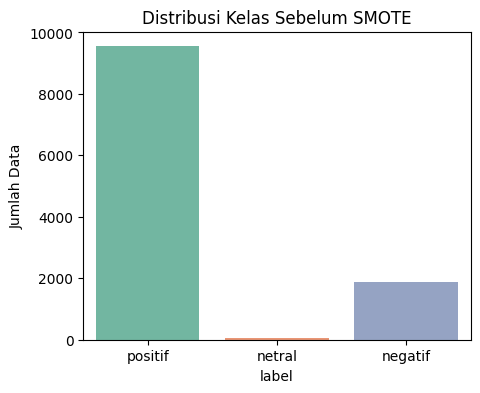


Distribusi Sesudah SMOTE:
label
positif    7637
negatif    7637
netral     7637
Name: count, dtype: int64


/tmp/ipython-input-2328088900.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train_smote, palette="cool")


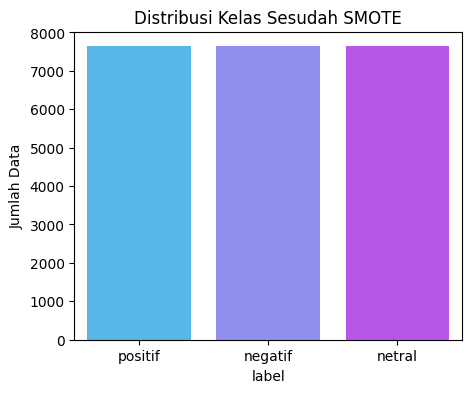

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("ulasan_halodoc_tfidf.csv")

# Pisahkan fitur dan label
X = df.drop(columns=["label", "Stemmed", "Clean_Joined"], errors="ignore")
y = df["label"]

# Tampilkan distribusi sebelum SMOTE
print("Distribusi Sebelum SMOTE:")
print(y.value_counts())
plt.figure(figsize=(5,4))
sns.countplot(x=y, palette="Set2")
plt.title("Distribusi Kelas Sebelum SMOTE")
plt.xlabel("label")
plt.ylabel("Jumlah Data")
plt.show()

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Terapkan SMOTE hanya pada data train
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Gabungkan hasil SMOTE
df_smote = pd.concat([pd.DataFrame(X_train_smote, columns=X.columns),
                      pd.Series(y_train_smote, name="label")], axis=1)

df_smote.to_csv("ulasan_halodoc_smote.csv", index=False, encoding="utf-8")

# Tampilkan distribusi sesudah SMOTE
print("\nDistribusi Sesudah SMOTE:")
print(y_train_smote.value_counts())
plt.figure(figsize=(5,4))
sns.countplot(x=y_train_smote, palette="cool")
plt.title("Distribusi Kelas Sesudah SMOTE")
plt.xlabel("label")
plt.ylabel("Jumlah Data")
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Gunakan data hasil SMOTE yang sudah dibuat
X_train = X_train_smote
y_train = y_train_smote

# Buat dan latih model SVM
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# Prediksi dan evaluasi
y_pred = svm_model.predict(X_test)

print("Akurasi:", accuracy_score(y_test, y_pred))
print("\nLaporan Klasifikasi:\n", classification_report(y_test, y_pred))


Akurasi: 0.8955613577023499

Laporan Klasifikasi:
               precision    recall  f1-score   support

     negatif       0.74      0.91      0.81       377
      netral       0.09      0.82      0.17        11
     positif       0.98      0.89      0.94      1910

    accuracy                           0.90      2298
   macro avg       0.60      0.87      0.64      2298
weighted avg       0.94      0.90      0.91      2298

